# A hands-on tutorial for data science learners: COVID-19 dataset -- Part 5: Groupby & Grouper

The main goal of this article, which is a part of a more comprehensive set of tutorials, is to provide a hands-on tutorial for data science learners. Although you may find some useful statistical information about the COVID-19, please note that studying the COVID-19 is not the primary objective here. Hence, you may discern that a large portion of this set of tutorials is devoted to teaching how to use Python and useful packages like _pandas_, _matplotlib_, _seaborn_, etc., in order to accomplish several important tasks in the context of data science. For example, these tutorials will hopefully help you with exploratory data analysis (EDA), data cleansing, statistical analysis, and data visualization of a generic dataset. Yet, some interesting findings will be revealed thanks to the comprehensive dataset provided by _Our World in Data_.


## What you learnt from the past:
**Pandas:**<br>
A1) Reading a csv file from your computer or a host on the web, and storing it using a pandas dataframe.<br>
A2) To examine the dataset using the pandas methods such as `head`, `tail`, `info`, and `describe`.<br>
A3) Selecting columns of dataframe based on their type using the method `select_dtypes`.<br>
A4) Selecting numeric and non-numeric variables of a dataframe.<br>
A5) Checking for the duplicate rows in a dataframe using the method `duplicated`.<br>
A6) Checking for the missing values in a dataframe using the method `isnull`.<br>
A7) Methods of `any` and `sum`.<br>
A8) Extracing a subset of dataset based on a given condition.<br>
A9) Transposing index and columns of a dataframe using the method `transpose`.<br>
A10) The datetime data types.<br>
A11) How to convert the data type of a variable of dataframe from object to datetime using the function of `to_datetime`.<br>
A12) Grouping a dataframe based on its columns using the `groupby` method, and compute operations on the resulted groups.<br>
A13) Analyzing the dataset, focusing on missing values.<br>

**Matplotlib:**<br>
B1) Using the _matplotlib_ library to visualize a time series data.<br>
B2) Creating different types of plots using the functions `bar` and `plot`.<br>
B3) Using `subplots` for creating an array of figures.<br>
B4) Adjust the spacing between subplots using `subplots_adjust`.<br>
B5) Plotting multiple graphs on the same axes.<br>
B6) Setting labels and titles of plots.<br>
B7) Adjusting the size of figures.<br>
B8) Adding legend to plots.<br>
B9) Visualizing the number of missing values of each column of dataframe using bar-plot.<br>
B10) Visualizing an ordered dictionary using bar-plot.<br>
B11) Saving the figure on the disk using the `savefig` method.<br>

**Python:**<br>
C1) Using ordered dictionary.<br>


## What you will hopefully learn here:
**Pandas:**<br>
Z1) Using `groupby` and `grouper` to group a dataframe based on multiple columns, one of which is a `datatime`, for the purpose of performing operations on each group. It enables one to prepare reports with different time-scales, e.g. daily, weekly, monthly, etc.<br>
Z2) Multi-Index dataframe.<br>
Z3) Partial indexing.<br>

**Matplotlib**:<br>
Y1) Setting configurations for visualization of time-series, wherein an axis is a `datetime`.<br>
Y2) Some capabilities from the module `date`. 


## COVID-19 Dataset from "Our World in Data"

The COVID-19 dataset that is analyzed in this study, is a collection of the COVID-19 data maintained by "Our World in Data". It is updated daily and includes data on confirmed cases, deaths, hospitalizations, testing, and vaccinations as well as other variables of potential interest [[source]](https://github.com/owid/covid-19-data/tree/master/public/data). 
A full codebook containing a description and source for each variable in the dataset is accessible from [here](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv).

# Loading the libraries

Let's first load the required libraries:

In [1]:
import numpy as np
import pandas as pd
import requests

#for visualization
import matplotlib.pyplot as plt
from matplotlib import dates as mdates

#for dynamic visualization
import time
from IPython import display

# Loading and pre-process the dataset

Now, let's read tha dataset from the csv file we have stored locally, as seen in the previous tutorials.

In [2]:
fname = 'owid-covid-data.csv'
df = pd.read_csv(fname)

### ***Reading the dataset into a pandas dataframe directly from the URL***

Alternatively, you can read the most-updated dataset into a pandas dataframe directly from its remote repository, as shown below:

In [3]:
import io
csv_url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
req = requests.get(csv_url)
s=requests.get(csv_url).content
df_from_url=pd.read_csv(io.StringIO(s.decode('utf-8')))

### Converting the data type of date from object to datetime

As seen in previous tutorials, in order to convert the variable `date` from an object to a datetime, we can use the pandas' function `to_datetime`:

In [4]:
#for our local dataset
df.date = pd.to_datetime(df.date)

#for the most up-to-date dataset directly fetched from the remote repository
df_from_url.date = pd.to_datetime(df_from_url.date)

For this tutorial, let's use the most up-to-date dataset at the time of writing:

In [5]:
df = df_from_url.copy()

# Pandas | Groupby & Grouper

In the past, we used the `groupby` method to group our DataFrame based on the column `location`, and found the average of stats over the whole time-series. However, it is more insightful to report the stats of each location over shorter time-scales, e.g. weekly, monthly, quarterly, etc. We can use a combination of `groupby` and `grouper` to accomplish this goal [(More information from Ref)](https://pandas.pydata.org/docs/reference/api/pandas.Grouper.html). 

Regarding the operation to be performed on each group, there are numerous types of built-in operations that can be used, e.g. **mean**, **max**, **min**, **median**, etc., [(More information from Ref)](https://pandas.pydata.org/docs/reference/groupby.html), as well as callable functions to be defined by user and implemented using [**apply**](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.apply.html#pandas.core.groupby.GroupBy.apply), [**transform**](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.transform.html#pandas.core.groupby.DataFrameGroupBy.transform), etc. We will try to discuss such details in another tutorial. 

For the purpose of this tutorial, let us assume we want to find the monthly stats such as **new cases**, **new deaths**, **new tests**, **new vaccination**, etc. So, we need to group our dataframe into monthly time intervals (`freq='M'`). But, what about the operation? What pre-built operation would you use to find the monthly stats?

Did you answer _mean_ or _sum_?!!

We need to use the **sum** operation, since it returns the summation of daily-recorded data for each group. It is worth mentioning that the pre-built operation of **mean** returns the average of our daily-recorded data for each group. For example, it would tell you how many **daily** `new_cases` there are **in average** for each group; that would be the average number of daily new cases in each month. It could be useful for some analysis, but here, we are interested in the stats of **total** new cases, new deaths, new tests, etc., over the course of each month.

Here is how we can achieve the goal:

In [6]:
df_location_m = df.groupby([
    'location',
    pd.Grouper(key='date', axis=0, freq='M'), 
]).sum()

df_location_m

total_cases  new_cases  new_cases_smoothed  \
location    date                                                     
Afghanistan 2020-02-29         30.0        5.0               0.714   
            2020-03-31       1141.0      161.0             102.143   
            2020-04-30      25152.0     1661.0            1451.713   
            2020-05-31     222720.0    13353.0           11601.569   
            2020-06-30     751685.0    16265.0           17534.144   
...                             ...        ...                 ...   
Zimbabwe    2021-07-31    2471417.0    58996.0           56779.715   
            2021-08-31    3706768.0    15913.0           20709.857   
            2021-09-30    3823536.0     6047.0            5666.999   
            2021-10-31    4096547.0     2157.0            2881.285   
            2021-11-30    3200995.0      770.0             802.000   

                        total_deaths  new_deaths  new_deaths_smoothed  \
location    date                                                        
Afghanistan 2020-02-29           0.0         0.0                0.000   
            2020-03-31          21.0         4.0                2.716   
            2020-04-30         812.0        56.0               49.002   
            2020-05-31        4924.0       194.0              187.141   
            2020-06-30       14982.0       485.0              464.287   
...                              ...         ...                  ...   
Zimbabwe    2021-07-31       79087.0      1743.0             1591.429   
            2021-08-31      126703.0       887.0             1051.999   
            2021-09-30      136426.0       204.0              224.857   
            2021-10-31      144217.0        55.0               65.286   
            2021-11-30      112632.0        25.0               24.573   

                        total_cases_per_million  new_cases_per_million  \
location    date                                                         
Afghanistan 2020-02-29                    0.756                  0.126   
            2020-03-31                   28.646                  4.042   
            2020-04-30                  631.400                 41.699   
            2020-05-31                 5591.003                335.205   
            2020-06-30                18869.759                408.304   
...                                         ...                    ...   
Zimbabwe    2021-07-31               163754.903               3909.048   
            2021-08-31               245608.667               1054.389   
            2021-09-30               253345.660                400.670   
            2021-10-31               271435.238                142.922   
            2021-11-30               212096.390                 51.020   

                        new_cases_smoothed_per_million  \
location    date                                         
Afghanistan 2020-02-29                           0.018   
            2020-03-31                           2.568   
            2020-04-30                          36.444   
            2020-05-31                         291.238   
            2020-06-30                         440.165   
...                                                ...   
Zimbabwe    2021-07-31                        3762.196   
            2021-08-31                        1372.225   
            2021-09-30                         375.490   
            2021-10-31                         190.912   
            2021-11-30                          53.140   

                        total_deaths_per_million  ...  female_smokers  \
location    date                                  ...                   
Afghanistan 2020-02-29                     0.000  ...             0.0   
            2020-03-31                     0.525  ...             0.0   
            2020-04-30                    20.384  ...             0.0   
            2020-05-31                   123.606  ...             0.0   
       

We can see that the numeric data has been grouped and summed monthly for each location. And, here is the monthly-summed data for the location `World`:

In [7]:
df_location_m.loc['World']

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2020-01-31,3.853900e+04,9370.0,3.885286e+03,889.0,196.0,81.428,4.894,1.191,0.494,0.112,...,64.340,346.350,601.30,27.050,725.80,7.370,0.0,0.0,0.0,0.0
2020-02-29,1.672070e+06,76095.0,7.668871e+04,46911.0,2730.0,2626.142,212.328,9.662,9.737,5.957,...,186.586,1004.415,1743.77,78.445,2104.82,21.373,0.0,0.0,0.0,0.0
2020-03-31,9.064473e+06,790076.0,5.918419e+05,400552.0,41727.0,29893.717,1151.048,100.323,75.155,50.863,...,199.454,1073.685,1864.03,83.855,2249.98,22.847,0.0,0.0,0.0,0.0
2020-04-30,6.360775e+07,2404789.0,2.375038e+06,4400372.0,196326.0,190132.285,8077.209,305.371,301.595,558.781,...,193.020,1039.050,1803.90,81.150,2177.40,22.110,0.0,0.0,0.0,0.0
2020-05-31,1.452252e+08,2906727.0,2.786765e+06,9984824.0,149957.0,155051.429,18441.372,369.109,353.877,1267.920,...,199.454,1073.685,1864.03,83.855,2249.98,22.847,0.0,0.0,0.0,0.0
2020-06-30,2.466161e+08,4269635.0,4.109723e+06,13970916.0,145048.0,144629.572,31316.472,542.178,521.872,1774.091,...,193.020,1039.050,1803.90,81.150,2177.40,22.110,0.0,0.0,0.0,0.0
2020-07-31,4.318252e+08,7145484.0,6.841059e+06,19306882.0,175988.0,170203.003,54835.186,907.367,868.708,2451.677,...,199.454,1073.685,1864.03,83.855,2249.98,22.847,0.0,0.0,0.0,0.0
2020-08-31,6.717126e+08,7903975.0,7.944461e+06,25076209.0,183432.0,187423.858,85297.213,1003.684,1008.825,3184.294,...,199.454,1073.685,1864.03,83.855,2249.98,22.847,0.0,0.0,0.0,0.0
2020-09-30,8.948101e+08,8504691.0,8.416004e+06,29545347.0,164953.0,163985.001,113627.169,1079.966,1068.707,3751.804,...,193.020,1039.050,1803.90,81.150,2177.40,22.110,0.0,0.0,0.0,0.0


We can also visualize the stats. Here are some notes about the following code snippet:

A) Monthly-summed `new_cases` and `new_deaths` are plotted on two subplots.<br>
B) Configurations of axes, labels, title, etc., are set.<br>
C) The produced figure is saved as a png file. <br>

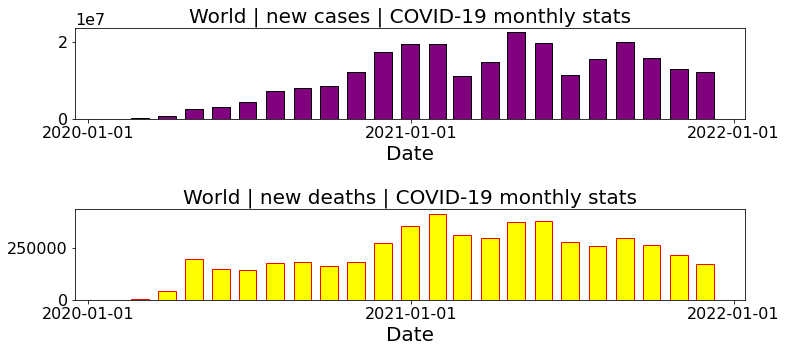

In [8]:
this_loc = 'World'
#this_loc = 'United States'

fig, ax = plt.subplots(2,1, figsize=(12,5), facecolor=(1, 1, 1))

this_col = 'new_cases'
ax[0].bar(df_location_m.loc[this_loc].index, df_location_m.loc[this_loc][this_col],
        color='purple',
        edgecolor='black',
        width=20, 
        linewidth=1
       );
fig_title = f"{this_loc} | {this_col.replace('_', ' ')} | COVID-19 monthly stats"
ax[0].set_xlabel('Date', fontsize=20)
ax[0].tick_params(axis='both', which='major', labelsize=16)
ax[0].yaxis.offsetText.set_fontsize(16)
ax[0].set_title(fig_title, fontsize=20)
locator = ax[0].xaxis.set_major_locator(mdates.YearLocator())

this_col = 'new_deaths'
ax[1].bar(df_location_m.loc[this_loc].index, df_location_m.loc[this_loc][this_col],
        color='yellow',
        edgecolor='red',
        width=20, 
        linewidth=1
       );
fig_title = f"{this_loc} | {this_col.replace('_', ' ')} | COVID-19 monthly stats"
ax[1].set_xlabel('Date', fontsize=20)
ax[1].tick_params(axis='both', which='major', labelsize=16)
ax[1].yaxis.offsetText.set_fontsize(16)
ax[1].set_title(fig_title, fontsize=20)
locator = ax[1].xaxis.set_major_locator(mdates.YearLocator())


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1)
plt.savefig(f"{this_loc}_Monthly-stats.png", bbox_inches='tight')

### Another example | weekly report

Now, let's group our dataframe based on `location` and `date` to prepare a **weekly** report of the stats:

In [9]:
df_location_w = df.groupby([
    'location',
    pd.Grouper(key='date', axis=0, freq='W'), 
]).sum()

df_location_w

total_cases  new_cases  new_cases_smoothed  \
location    date                                                     
Afghanistan 2020-03-01         35.0        5.0               1.428   
            2020-03-08         41.0        3.0               0.858   
            2020-03-15         83.0       12.0               6.000   
            2020-03-22        185.0       14.0              14.572   
            2020-03-29        547.0       80.0              51.714   
...                             ...        ...                 ...   
Zimbabwe    2021-10-31     929929.0      326.0             335.999   
            2021-11-07     931724.0      210.0             256.428   
            2021-11-14     933228.0      241.0             214.858   
            2021-11-21     934948.0      219.0             245.714   
            2021-11-28     401095.0      100.0              85.000   

                        total_deaths  new_deaths  new_deaths_smoothed  \
location    date                                                        
Afghanistan 2020-03-01           0.0         0.0                0.000   
            2020-03-08           0.0         0.0                0.000   
            2020-03-15           0.0         0.0                0.000   
            2020-03-22           0.0         0.0                0.000   
            2020-03-29          13.0         4.0                1.858   
...                              ...         ...                  ...   
Zimbabwe    2021-10-31       32725.0         9.0               13.143   
            2021-11-07       32786.0         7.0                8.716   
            2021-11-14       32855.0        11.0                9.857   
            2021-11-21       32890.0         3.0                5.000   
            2021-11-28       14101.0         4.0                1.000   

                        total_cases_per_million  new_cases_per_million  \
location    date                                                         
Afghanistan 2020-03-01                    0.882                  0.126   
            2020-03-08                    1.032                  0.075   
            2020-03-15                    2.083                  0.301   
            2020-03-22                    4.645                  0.352   
            2020-03-29                   13.731                  2.009   
...                                         ...                    ...   
Zimbabwe    2021-10-31                61616.648                 21.601   
            2021-11-07                61735.585                 13.914   
            2021-11-14                61835.237                 15.970   
            2021-11-21                61949.206                 14.510   
            2021-11-28                26576.362                  6.626   

                        new_cases_smoothed_per_million  \
location    date                                         
Afghanistan 2020-03-01                           0.036   
            2020-03-08                           0.022   
            2020-03-15                           0.153   
            2020-03-22                           0.367   
            2020-03-29                           1.298   
...                                                ...   
Zimbabwe    2021-10-31                          22.263   
            2021-11-07                          16.992   
            2021-11-14                          14.236   
            2021-11-21                          16.280   
            2021-11-28                           5.632   

                        total_deaths_per_million  ...  female_smokers  \
location    date                                  ...                   
Afghanistan 2020-03-01                     0.000  ...             0.0   
            2020-03-08                     0.000  ...             0.0   
            2020-03-15                     0.000  ...             0.0   
            2020-03-22                     0.000  ...             0.0   
       

Again, you can select the data for a given location:

In [10]:
df_location_w.loc['World']

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2020-01-26,5.705000e+03,1561.0,0.000,159.0,39.0,0.000,0.724,0.198,0.000,0.019,...,32.170,173.175,300.65,13.525,362.90,3.685,0.0,0.0,0.0,0.0
2020-02-02,6.165900e+04,14669.0,7495.714,1351.0,306.0,156.142,7.831,1.864,0.952,0.172,...,45.038,242.445,420.91,18.935,508.06,5.159,0.0,0.0,0.0,0.0
2020-02-09,2.139230e+05,23374.0,21752.000,4547.0,544.0,456.571,27.165,2.969,2.762,0.577,...,45.038,242.445,420.91,18.935,508.06,5.159,0.0,0.0,0.0,0.0
2020-02-16,4.003860e+05,31074.0,26637.572,9574.0,864.0,718.143,50.842,3.945,3.383,1.216,...,45.038,242.445,420.91,18.935,508.06,5.159,0.0,0.0,0.0,0.0
2020-02-23,5.347110e+05,7747.0,19189.286,15428.0,700.0,836.286,67.901,0.983,2.436,1.959,...,45.038,242.445,420.91,18.935,508.06,5.159,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,1.721452e+09,3053000.0,3009678.858,34866438.0,50695.0,50252.858,218598.094,387.684,382.184,4427.503,...,45.038,242.445,420.91,18.935,508.06,5.159,0.0,0.0,0.0,0.0
2021-11-07,1.743129e+09,3178320.0,3096617.000,35209728.0,49000.0,49041.428,221350.654,403.598,393.224,4471.095,...,45.038,242.445,420.91,18.935,508.06,5.159,0.0,0.0,0.0,0.0
2021-11-14,1.766572e+09,3425590.0,3349052.144,35560766.0,50566.0,50148.286,224327.603,434.996,425.279,4515.672,...,45.038,242.445,420.91,18.935,508.06,5.159,0.0,0.0,0.0,0.0


And visualize it:

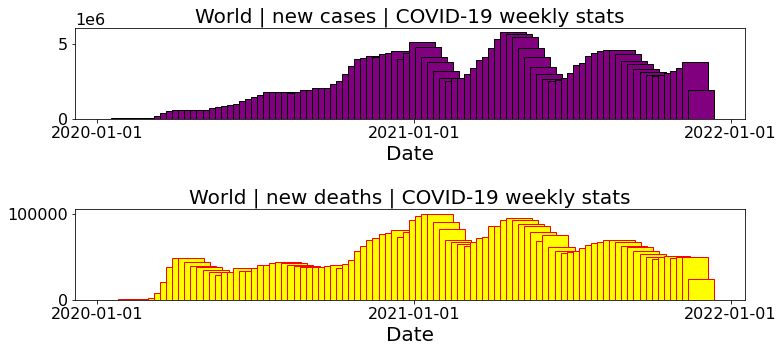

In [11]:
this_loc = 'World'
#this_loc = 'United States'

fig, ax = plt.subplots(2,1, figsize=(12,5), facecolor=(1, 1, 1))

this_col = 'new_cases'
ax[0].bar(df_location_w.loc[this_loc].index, df_location_w.loc[this_loc][this_col],
        color='purple',
        edgecolor='black',
        width=30, 
        linewidth=1
       );
fig_title = f"{this_loc} | {this_col.replace('_', ' ')} | COVID-19 weekly stats"
ax[0].set_xlabel('Date', fontsize=20)
ax[0].tick_params(axis='both', which='major', labelsize=16)
ax[0].yaxis.offsetText.set_fontsize(16)
ax[0].set_title(fig_title, fontsize=20)
locator = ax[0].xaxis.set_major_locator(mdates.YearLocator())

this_col = 'new_deaths'
ax[1].bar(df_location_w.loc[this_loc].index, df_location_w.loc[this_loc][this_col],
        color='yellow',
        edgecolor='red',
        width=30, 
        linewidth=1
       );
fig_title = f"{this_loc} | {this_col.replace('_', ' ')} | COVID-19 weekly stats"
ax[1].set_xlabel('Date', fontsize=20)
ax[1].tick_params(axis='both', which='major', labelsize=16)
ax[1].yaxis.offsetText.set_fontsize(16)
ax[1].set_title(fig_title, fontsize=20)
locator = ax[1].xaxis.set_major_locator(mdates.YearLocator())


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1)
plt.savefig(f"{this_loc}_Weekly-stats.png", bbox_inches='tight')

### Weekly stats for the United States

You could also select other locations to see how the trends look like. Here is what we get for `United States`:

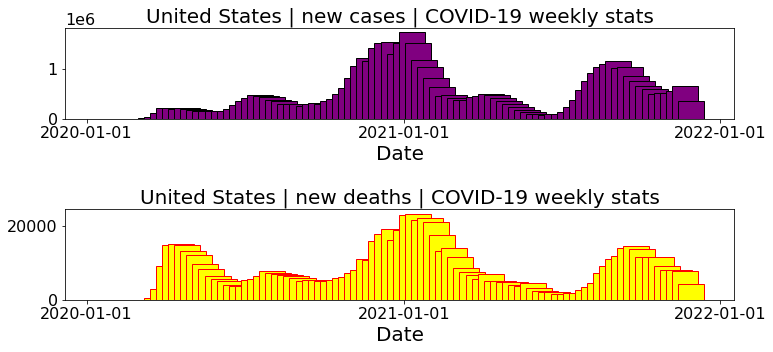

In [12]:
#this_loc = 'World'
this_loc = 'United States'

fig, ax = plt.subplots(2,1, figsize=(12,5), facecolor=(1, 1, 1))

this_col = 'new_cases'
ax[0].bar(df_location_w.loc[this_loc].index, df_location_w.loc[this_loc][this_col],
        color='purple',
        edgecolor='black',
        width=30, 
        linewidth=1
       );
fig_title = f"{this_loc} | {this_col.replace('_', ' ')} | COVID-19 weekly stats"
ax[0].set_xlabel('Date', fontsize=20)
ax[0].tick_params(axis='both', which='major', labelsize=16)
ax[0].yaxis.offsetText.set_fontsize(16)
ax[0].set_title(fig_title, fontsize=20)
locator = ax[0].xaxis.set_major_locator(mdates.YearLocator())

this_col = 'new_deaths'
ax[1].bar(df_location_w.loc[this_loc].index, df_location_w.loc[this_loc][this_col],
        color='yellow',
        edgecolor='red',
        width=30, 
        linewidth=1
       );
fig_title = f"{this_loc} | {this_col.replace('_', ' ')} | COVID-19 weekly stats"
ax[1].set_xlabel('Date', fontsize=20)
ax[1].tick_params(axis='both', which='major', labelsize=16)
ax[1].yaxis.offsetText.set_fontsize(16)
ax[1].set_title(fig_title, fontsize=20)
locator = ax[1].xaxis.set_major_locator(mdates.YearLocator())


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1)
plt.savefig(f"{this_loc}_Weekly-stats.png", bbox_inches='tight')

### Stats of tests and vaccinations

You could also do similar visualization for other stats such as number of tests and vaccinations:

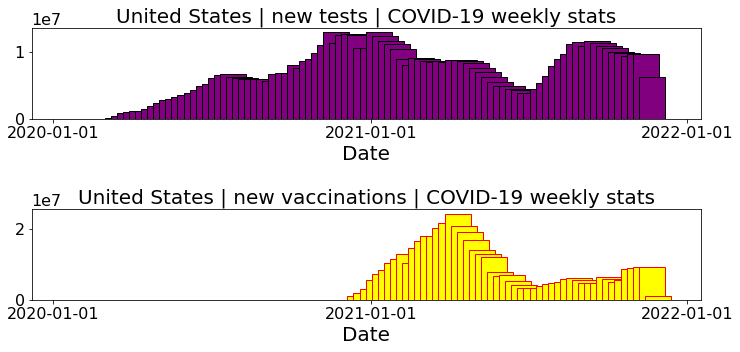

In [13]:
#this_loc = 'World'
this_loc = 'United States'

fig, ax = plt.subplots(2,1, figsize=(12,5), facecolor=(1, 1, 1))

this_col = 'new_tests'
ax[0].bar(df_location_w.loc[this_loc].index, df_location_w.loc[this_loc][this_col],
        color='purple',
        edgecolor='black',
        width=30, 
        linewidth=1
       );
fig_title = f"{this_loc} | {this_col.replace('_', ' ')} | COVID-19 weekly stats"
ax[0].set_xlabel('Date', fontsize=20)
ax[0].tick_params(axis='both', which='major', labelsize=16)
ax[0].yaxis.offsetText.set_fontsize(16)
ax[0].set_title(fig_title, fontsize=20)
locator = ax[0].xaxis.set_major_locator(mdates.YearLocator())

this_col = 'new_vaccinations'
ax[1].bar(df_location_w.loc[this_loc].index, df_location_w.loc[this_loc][this_col],
        color='yellow',
        edgecolor='red',
        width=30, 
        linewidth=1
       );
fig_title = f"{this_loc} | {this_col.replace('_', ' ')} | COVID-19 weekly stats"
ax[1].set_xlabel('Date', fontsize=20)
ax[1].tick_params(axis='both', which='major', labelsize=16)
ax[1].yaxis.offsetText.set_fontsize(16)
ax[1].set_title(fig_title, fontsize=20)
locator = ax[1].xaxis.set_major_locator(mdates.YearLocator())


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1)
plt.savefig(f"{this_loc}_Weekly-stats2.png", bbox_inches='tight')

## MultiIndex dataframe

Getting back to grouping operation, we can see that after grouping the original dataframe, `df`, by `location`, and `date`, the variables `location` and `date` are now used as the indices of the resulted dataframe `df_location_m`:

In [14]:
df_location_m.index

MultiIndex([('Afghanistan', '2020-02-29'),
            ('Afghanistan', '2020-03-31'),
            ('Afghanistan', '2020-04-30'),
            ('Afghanistan', '2020-05-31'),
            ('Afghanistan', '2020-06-30'),
            ('Afghanistan', '2020-07-31'),
            ('Afghanistan', '2020-08-31'),
            ('Afghanistan', '2020-09-30'),
            ('Afghanistan', '2020-10-31'),
            ('Afghanistan', '2020-11-30'),
            ...
            (   'Zimbabwe', '2021-02-28'),
            (   'Zimbabwe', '2021-03-31'),
            (   'Zimbabwe', '2021-04-30'),
            (   'Zimbabwe', '2021-05-31'),
            (   'Zimbabwe', '2021-06-30'),
            (   'Zimbabwe', '2021-07-31'),
            (   'Zimbabwe', '2021-08-31'),
            (   'Zimbabwe', '2021-09-30'),
            (   'Zimbabwe', '2021-10-31'),
            (   'Zimbabwe', '2021-11-30')],
           names=['location', 'date'], length=4637)

As a result, you can access all the data related to a specific location, say `World`, using **partial indexing** as shown below. The reason it is called **partial indexing** is that we use only a part of the whole index tuple.

In [15]:
df_location_m.loc['World']

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2020-01-31,3.853900e+04,9370.0,3.885286e+03,889.0,196.0,81.428,4.894,1.191,0.494,0.112,...,64.340,346.350,601.30,27.050,725.80,7.370,0.0,0.0,0.0,0.0
2020-02-29,1.672070e+06,76095.0,7.668871e+04,46911.0,2730.0,2626.142,212.328,9.662,9.737,5.957,...,186.586,1004.415,1743.77,78.445,2104.82,21.373,0.0,0.0,0.0,0.0
2020-03-31,9.064473e+06,790076.0,5.918419e+05,400552.0,41727.0,29893.717,1151.048,100.323,75.155,50.863,...,199.454,1073.685,1864.03,83.855,2249.98,22.847,0.0,0.0,0.0,0.0
2020-04-30,6.360775e+07,2404789.0,2.375038e+06,4400372.0,196326.0,190132.285,8077.209,305.371,301.595,558.781,...,193.020,1039.050,1803.90,81.150,2177.40,22.110,0.0,0.0,0.0,0.0
2020-05-31,1.452252e+08,2906727.0,2.786765e+06,9984824.0,149957.0,155051.429,18441.372,369.109,353.877,1267.920,...,199.454,1073.685,1864.03,83.855,2249.98,22.847,0.0,0.0,0.0,0.0
2020-06-30,2.466161e+08,4269635.0,4.109723e+06,13970916.0,145048.0,144629.572,31316.472,542.178,521.872,1774.091,...,193.020,1039.050,1803.90,81.150,2177.40,22.110,0.0,0.0,0.0,0.0
2020-07-31,4.318252e+08,7145484.0,6.841059e+06,19306882.0,175988.0,170203.003,54835.186,907.367,868.708,2451.677,...,199.454,1073.685,1864.03,83.855,2249.98,22.847,0.0,0.0,0.0,0.0
2020-08-31,6.717126e+08,7903975.0,7.944461e+06,25076209.0,183432.0,187423.858,85297.213,1003.684,1008.825,3184.294,...,199.454,1073.685,1864.03,83.855,2249.98,22.847,0.0,0.0,0.0,0.0
2020-09-30,8.948101e+08,8504691.0,8.416004e+06,29545347.0,164953.0,163985.001,113627.169,1079.966,1068.707,3751.804,...,193.020,1039.050,1803.90,81.150,2177.40,22.110,0.0,0.0,0.0,0.0


You could also access the data for a given `location` and `date`, e.g. **World** and **2020-02-29**, as:

In [16]:
df_location_m.loc[('World', '2020-02-29')]

total_cases                                1672070.000
new_cases                                    76095.000
new_cases_smoothed                           76688.715
total_deaths                                 46911.000
new_deaths                                    2730.000
                                              ...     
human_development_index                         21.373
excess_mortality_cumulative_absolute             0.000
excess_mortality_cumulative                      0.000
excess_mortality                                 0.000
excess_mortality_cumulative_per_million          0.000
Name: (World, 2020-02-29 00:00:00), Length: 62, dtype: float64

Similar to what you saw in the case of simple indexing, you can pass a list of columns to \[ \] to select columns in that order. For example, to select `total_cases`, `total_deaths`, `population`, and `life_expectancy`:

In [17]:
df_location_m[['total_cases', 'total_deaths', 'population', 'life_expectancy']]

total_cases  total_deaths    population  \
location    date                                                  
Afghanistan 2020-02-29         30.0           0.0  2.390126e+08   
            2020-03-31       1141.0          21.0  1.234898e+09   
            2020-04-30      25152.0         812.0  1.195063e+09   
            2020-05-31     222720.0        4924.0  1.234898e+09   
            2020-06-30     751685.0       14982.0  1.195063e+09   
...                             ...           ...           ...   
Zimbabwe    2021-07-31    2471417.0       79087.0  4.678573e+08   
            2021-08-31    3706768.0      126703.0  4.678573e+08   
            2021-09-30    3823536.0      136426.0  4.527651e+08   
            2021-10-31    4096547.0      144217.0  4.678573e+08   
            2021-11-30    3200995.0      112632.0  3.622121e+08   

                        life_expectancy  
location    date                         
Afghanistan 2020-02-29           388.98  
            2020-03-31          2009.73  
            2020-04-30          1944.90  
            2020-05-31          2009.73  
            2020-06-30          1944.90  
...                                 ...  
Zimbabwe    2021-07-31          1906.19  
            2021-08-31          1906.19  
            2021-09-30          1844.70  
            2021-10-31          1906.19  
            2021-11-30          1475.76  

[4637 rows x 4 columns]

Finally, you can also select a slice of dataframe, based on 1. column and 2. index. For example, to select `total_cases`, `total_deaths`, `population`, and `life_expectancy` of `United States`, `Africa`, `Asia`, `Europe`, `Oceania`, `South America`, `North America`, and `World`:

In [18]:
df_location_m[['total_cases', 'total_deaths', 'population', 'life_expectancy']].loc[[
    'United States', 'Africa', 'Asia', 'Europe', 'Oceania', 'South America', 'North America', 'World'
]]

total_cases  total_deaths    population  \
location      date                                                   
United States 2020-01-31  4.100000e+01           0.0  3.329151e+09   
              2020-02-29  4.020000e+02           1.0  9.654537e+09   
              2020-03-31  1.121455e+06       26042.0  1.032037e+10   
              2020-04-30  1.995212e+07     1069596.0  9.987452e+09   
              2020-05-31  4.553222e+07     2799459.0  1.032037e+10   
...                                ...           ...           ...   
World         2021-07-31  5.894810e+09   126605118.0  2.441239e+11   
              2021-08-31  6.465491e+09   135607014.0  2.441239e+11   
              2021-09-30  6.809671e+09   139866312.0  2.362490e+11   
              2021-10-31  7.467287e+09   151790608.0  2.441239e+11   
              2021-11-30  6.078241e+09   122185569.0  1.889992e+11   

                          life_expectancy  
location      date                         
United States 2020-01-31           788.60  
              2020-02-29          2286.94  
              2020-03-31          2444.66  
              2020-04-30          2365.80  
              2020-05-31          2444.66  
...                                   ...  
World         2021-07-31          2249.98  
              2021-08-31          2249.98  
              2021-09-30          2177.40  
              2021-10-31          2249.98  
              2021-11-30          1741.92  

[182 rows x 4 columns]

# Final remarks

Hopefully, this short tutorial was able to help you use Python in future to get more insight into your own dataset. The process of development of this set of tutorials is ongoing at the time of writing. To learn more, you can check out to see if the next parts are available online. You can also check out the forums, in case you want to check out the discussions that might be relevant to this topic. 